In [1]:
import time
import pandas as pd
import numpy as np

city_con = {
    1: ["chicago.csv","Chicago"],
    2: ["new_york_city.csv","New York City"],
    3: ["washington.csv","Washington"],
    4:[0,"Exit"],
    "NS":[0,"Not selected"]
}


fltr_choice = {
    1:"Month",
    2:"Day",
    3:"Show all data",
    4:"Exit",
    "NS":"Not selected"
}


days_con = {
    0: "Saturday",
    1: "Sunday",
    2: "Monday",
    3: "Tuesday",
    4: "Wednesday",
    5: "Thursday",
    6: "Friday",
    "NS": "Not selected"
}


months_con = {
    1: ["January",31],
    2: ["February",28],
    3: ["March",31],
    4: ["April",30],
    5: ["May",31],
    6: ["June",30],
    "NS":["Not selected",0]
}

In [2]:
def get_filters():
    city=dy=fltr=mon="NS"
    print('Hello! Let\'s explore some US bikeshare data!')
    while True:
        city = int(input("Would you like to see data for Chicago Enter 1, New York City Enter 2, Washington Enter 3 ,or 4 to exit:: "))
        if city==1 or city==2 or city==3:
            print("You have entered ", city_con[city][1])
            break
        elif city == 4:
            print("You choosed to exit")
            break
        else:
            print("You have entered a wrong number, Kindly try again")

    while True:
        if city==4:
            break
        fltr = int(input("Would you like to filter the data by month Enter 1, day Enter 2, not at all Enter 3 or 4 to exit:: "))
        if fltr==1 or fltr==2 or fltr==3 :
            print("You have choosed:", fltr_choice[fltr])
            if fltr==1:
                dy="NS"
            elif fltr==2:
                mon="NS"
            else:
                dy=mon="NS"
            break
        elif fltr == 4:
            print("You choosed to exit")
            break
        else:
            print("You have entered a wrong number, Kindly try again")

    while True:
        if city==4 or fltr==3 or fltr==4:
            break
        elif fltr==1:
            mon = int(input("January Enter 1, February Enter 2, March Enter 3, April Enter 4, May Enter 5, June Enter 6 :: "))    
            break
        elif fltr==2:
            dy = int(input("Saturday Enter 0, Sunday Enter 1, Monday Enter 2, Tuesday Enter 3, Wednesday Enter 4, Thursday Enter 5, FridayEnter 6 :: "))
            break
        else:
            print("You have entered a wrong number, Kindly try again")
    
    
    
    print("\n")
    print('-'*40)
    return city, fltr, mon, dy
    


In [556]:
def day_to_letter(month,day):
    if month>1:
        for i in range(1,month):
            day=day+months_con[i][1]
    return days_con[day%7]

In [557]:
def load_data(city, fltr, mon, dy):
    if city==4 or fltr==4:
        return 0
    else:
        df = pd.read_csv(city_con[city][0])
        df['Start Time'] = pd.to_datetime(df['Start Time'])  # convert the Start Time column to datetime
        df['year'] = df['Start Time'].dt.year
        df['month'] = df['Start Time'].dt.month
        df['day'] = df['Start Time'].dt.day
        df['hour'] = df['Start Time'].dt.hour
        df["dayletter"] = df[["month","day"]].apply(lambda x: day_to_letter(*x),axis=1)
        df["trip"]= "From " + df["Start Station"] + " to " + df["End Station"]
  
    if fltr == 1:                                    # filter by day of week if applicable
        df = df[df['month'] == mon]                  # filter by day of week to create the new dataframe
    if fltr == 2:                                    # filter by day of week if applicable
        df = df[df['dayletter'] == days_con[dy]]     # filter by day of week to create the new dataframe

    return df

In [561]:
def time_stats(df,fltr):
    if city==4 or fltr==4:
        return 0
    else:
        if fltr != 1:
            print("*) The most common month is",months_con[df["month"].value_counts().index[0]][0], ", with a total bike riders of",df["month"].value_counts().iloc[0],".\n")
        elif fltr != 2:
            print("*) The most common day of the week is",df["dayletter"].value_counts().index[0], ", with a total bike riders of",df["dayletter"].value_counts().iloc[0],".\n")
        
        print("*) The most common start hour is",df["hour"].value_counts().index[0], ":00 , with a total bike riders of",df["hour"].value_counts().iloc[0],".\n")
        print('-'*40)
    


In [558]:
def station_stats(df):
    if city==4 or fltr==4:
        return 0
    else:
        print("*) The most common start station is ",df['Start Station'].value_counts().index[0]," and there are ",df['Start Station'].value_counts()[0], " bike riders started out of there.\n")
        print("*) The first five start stations (sorted by the total number of users) are: ", df['Start Station'].value_counts().index[0:5], "\n")    
        print("*) The most common end station is ",df['End Station'].value_counts().index[0]," and there are ",df['End Station'].value_counts()[0], " bike riders ended there.\n")
        print("*) The first five start stations (sorted by the total number of users) are: ", df['End Station'].value_counts().index[0:5], "\n")
        print("\n*) The most common rout (same start and end stations) is ", df["trip"].value_counts().index[0]," and there are ",df['trip'].value_counts()[0], " used it.\n")
        print('-'*40)


In [559]:
def trip_duration_stats(df):
    if city==4 or fltr==4:
        return 0
    else:
        print("*) The smallest trip duration is ",df["Trip Duration"].min()," seconds, for the trip ",df.loc[df["Trip Duration"] == (df["Trip Duration"].min()),"trip"].iloc[0], ".\n")
        print("*) The longest trip duration is ",df["Trip Duration"].max()," seconds, for the trip ",df.loc[df["Trip Duration"] == (df["Trip Duration"].max()),"trip"].iloc[0], ".\n")
        print("*) The trip duration first quartile  = ", df["Trip Duration"].quantile(.25) ,"\n   The trip duration second quartile = ", df["Trip Duration"].quantile(),"\n   The trip duration third quartile  = ", df["Trip Duration"].quantile(.75),"\n")  
        print('-'*40)



In [560]:
def user_stats(df):
    if city==4 or fltr==4:
        return 0
    else:
        v0=df["User Type"].value_counts()[0]
        v1=df["User Type"].value_counts()[1]
        v00=((v0/(v0+v1))*100).round(2)
        v11=((v1/(v0+v1))*100).round(2)
        print("*) The ",df["User Type"].value_counts().index[0]," bike riders are ",df["User Type"].value_counts()[0], ", and they are ", v00, " % of all population\n")
        print("*) The ",df["User Type"].value_counts().index[1]," bike riders are ",df["User Type"].value_counts()[1], ", and they are ", v11, " % of all population\n")  
        if city != 3:
            g0=df["Gender"].value_counts()[0]
            g1=df["Gender"].value_counts()[1]
            g00=((g0/(g0+g1))*100).round(2)
            g11=((g1/(g0+g1))*100).round(2)
            print("*) The ",df["Gender"].value_counts().index[0]," bike riders are ",df["Gender"].value_counts()[0], ", and they are ", g00, " % of all population\n")
            print("*) The ",df["Gender"].value_counts().index[1]," bike riders are ",df["Gender"].value_counts()[1], ", and they are ", g11, " % of all population\n")  
            
            print("*) The youngest bike rider is ", 2021-df["Birth Year"].max(), " years old.\n")
            print("*) The oldest bike rider is ", 2021-df["Birth Year"].min(), " years old.\n")

        print('-'*40)


In [563]:
def main():
    while True:
        city, fltr, mon, dy = get_filters()
        df = load_data(city, fltr, mon, dy)
        time_stats(df,fltr)
        station_stats(df)
        trip_duration_stats(df)
        user_stats(df)

        restart = input('\nWould you like to restart? Enter yes or no.\n')
        if restart.lower() != 'yes':
            print("Thank you!")
            break


if __name__ == "__main__":
	main()

Hello! Let's explore some US bikeshare data!
Would you like to see data for Chicago Enter 1, New York City Enter 2, Washington Enter 3 ,or 4 to exit:: 1
You have entered  Chicago
Would you like to filter the data by month Enter 1, day Enter 2, not at all Enter 3 or 4 to exit:: 3
You have choosed: Show all data


----------------------------------------
*) The most common month is June , with a total bike riders of 98081 .

*) The most common start hour is 17 :00 , with a total bike riders of 35992 .

----------------------------------------
*) The most common start station is  Streeter Dr & Grand Ave  and there are  6911  bike riders started out of there.

*) The first five start stations (sorted by the total number of users) are:  Index(['Streeter Dr & Grand Ave', 'Clinton St & Washington Blvd',
       'Lake Shore Dr & Monroe St', 'Clinton St & Madison St',
       'Canal St & Adams St'],
      dtype='object') 

*) The most common end station is  Streeter Dr & Grand Ave  and there are 

KeyboardInterrupt: Interrupted by user

In [15]:
import pandas as pd
df = pd.read_csv(city_con[city][0])
print(df.head())    # start by viewing the first few rows of the dataset!

   Unnamed: 0           Start Time             End Time  Trip Duration  \
0     1423854  2017-06-23 15:09:32  2017-06-23 15:14:53            321   
1      955915  2017-05-25 18:19:03  2017-05-25 18:45:53           1610   
2        9031  2017-01-04 08:27:49  2017-01-04 08:34:45            416   
3      304487  2017-03-06 13:49:38  2017-03-06 13:55:28            350   
4       45207  2017-01-17 14:53:07  2017-01-17 15:02:01            534   

                   Start Station                   End Station   User Type  \
0           Wood St & Hubbard St       Damen Ave & Chicago Ave  Subscriber   
1            Theater on the Lake  Sheffield Ave & Waveland Ave  Subscriber   
2             May St & Taylor St           Wood St & Taylor St  Subscriber   
3  Christiana Ave & Lawrence Ave  St. Louis Ave & Balmoral Ave  Subscriber   
4         Clark St & Randolph St  Desplaines St & Jackson Blvd  Subscriber   

   Gender  Birth Year  
0    Male      1992.0  
1  Female      1992.0  
2    Male     

In [253]:
df['Start Time'] = pd.to_datetime(df['Start Time'])  # convert the Start Time column to datetime
df['year'] = df['Start Time'].dt.year
df['month'] = df['Start Time'].dt.month
df['day'] = df['Start Time'].dt.day
df['hour'] = df['Start Time'].dt.hour
df['min'] = df['Start Time'].dt.minute
df['sec'] = df['Start Time'].dt.second
df["dayletter"] = df[["month","day"]].apply(lambda x: day_to_letter(*x),axis=1)


,Unnamed: 0,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year,trip,year,month,day,hour,min,sec,dayletter
0,1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992.0,From Wood St & Hubbard St to Damen Ave & Chica...,2017,6,23,15,9,32,Friday
1,955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992.0,From Theater on the Lake to Sheffield Ave & Wa...,2017,5,25,18,19,3,Thursday
2,9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981.0,From May St & Taylor St to Wood St & Taylor St,2017,1,4,8,27,49,Wednesday
3,304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986.0,From Christiana Ave & Lawrence Ave to St. Loui...,2017,3,6,13,49,38,Monday
4,45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975.0,From Clark St & Randolph St to Desplaines St &...,2017,1,17,14,53,7,Tuesday


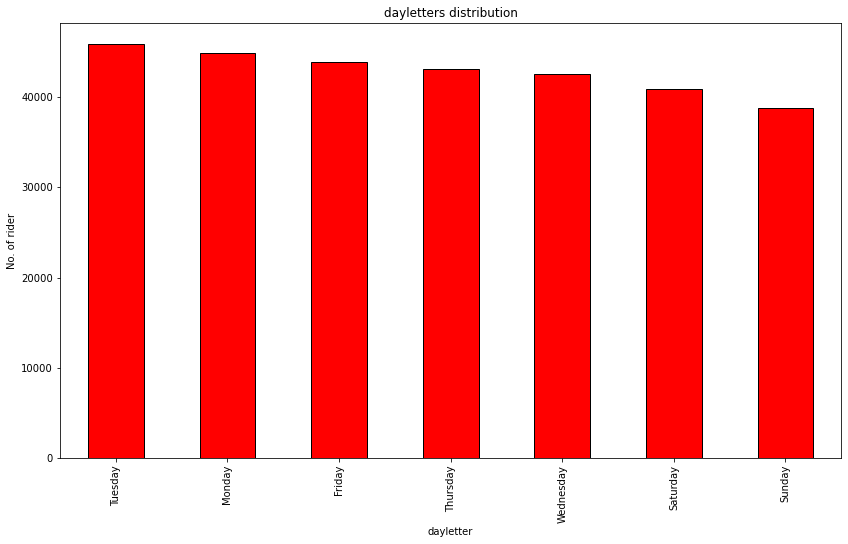

In [265]:
x=df["dayletter"].value_counts()

import matplotlib.pyplot as plt
%matplotlib inline  
#only with jupyter to plot inline

x.plot(kind="bar",figsize=(14,8), color='red', edgecolor='black')
plt.xlabel(x.name)
plt.ylabel("No. of rider")
plt.title("%ss distribution" % x.name)
plt.show()


In [250]:
df['Start Time'] = pd.to_datetime(df['Start Time'])  # convert the Start Time column to datetime
df['year'] = df['Start Time'].dt.year
df['month'] = df['Start Time'].dt.month
df['day'] = df['Start Time'].dt.day
df['hour'] = df['Start Time'].dt.hour
df['min'] = df['Start Time'].dt.minute
df['sec'] = df['Start Time'].dt.second


month = int(input("please enter a month: "))
day = int(input("please enter a day: "))

def day_to_letter(month,day):
    if month>1:
        for i in range(1,month):
            day=day+months_con[i][1]
    return days_con[day%7]

day_to_letter(month,day)

please enter a month: 5
please enter a day: 3


'Wednesday'

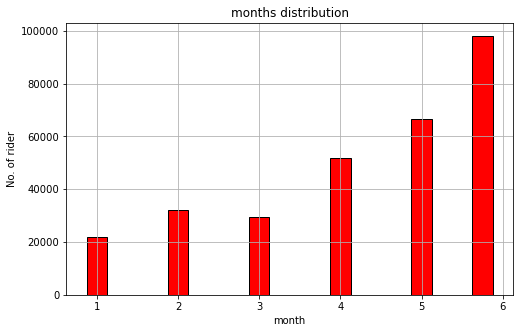

count    300000.000000
mean          4.345790
std           1.609719
min           1.000000
25%           3.000000
50%           5.000000
75%           6.000000
max           6.000000
Name: month, dtype: float64


In [229]:
df['Start Time'] = pd.to_datetime(df['Start Time'])  # convert the Start Time column to datetime
df['year'] = df['Start Time'].dt.year
df['month'] = df['Start Time'].dt.month
df['day'] = df['Start Time'].dt.day
df['hour'] = df['Start Time'].dt.hour
df['min'] = df['Start Time'].dt.minute
df['sec'] = df['Start Time'].dt.second

x= df['month']


import matplotlib.pyplot as plt
%matplotlib inline  
#only with jupyter to plot inline

x.hist(bins=20, figsize=(8,5), align='left', color='red', edgecolor='black')
plt.xlabel(x.name)
plt.ylabel("No. of rider")
plt.title("%ss distribution" % x.name)
plt.show()
print(x.describe())

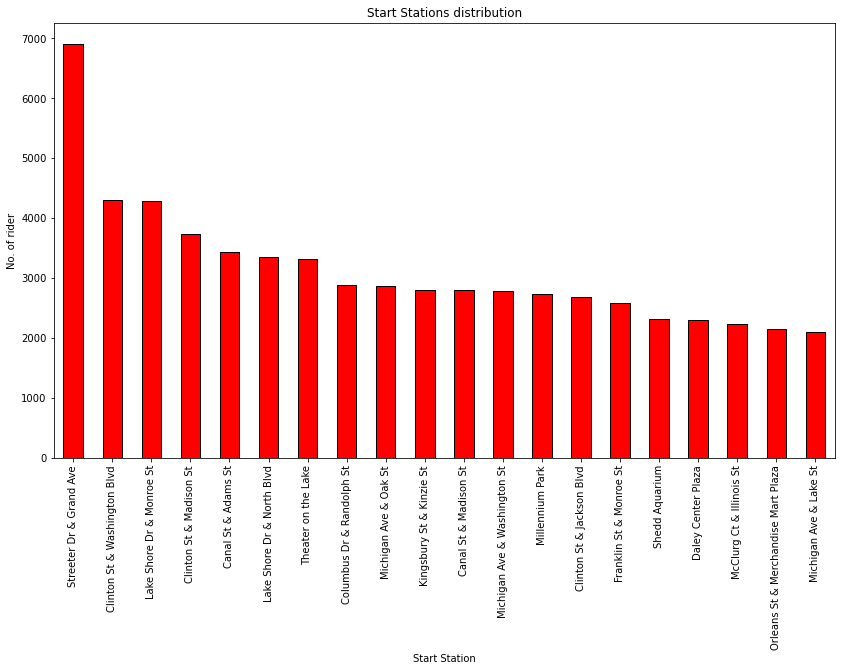

In [87]:
x= df['Start Station'].value_counts().iloc[0:20] # the maximum 10 stations

import matplotlib.pyplot as plt
%matplotlib inline  
#only with jupyter to plot inline

x.plot(kind="bar",figsize=(14,8), color='red', edgecolor='black')
plt.xlabel(x.name)
plt.ylabel("No. of rider")
plt.title("%ss distribution" % x.name)
plt.show()




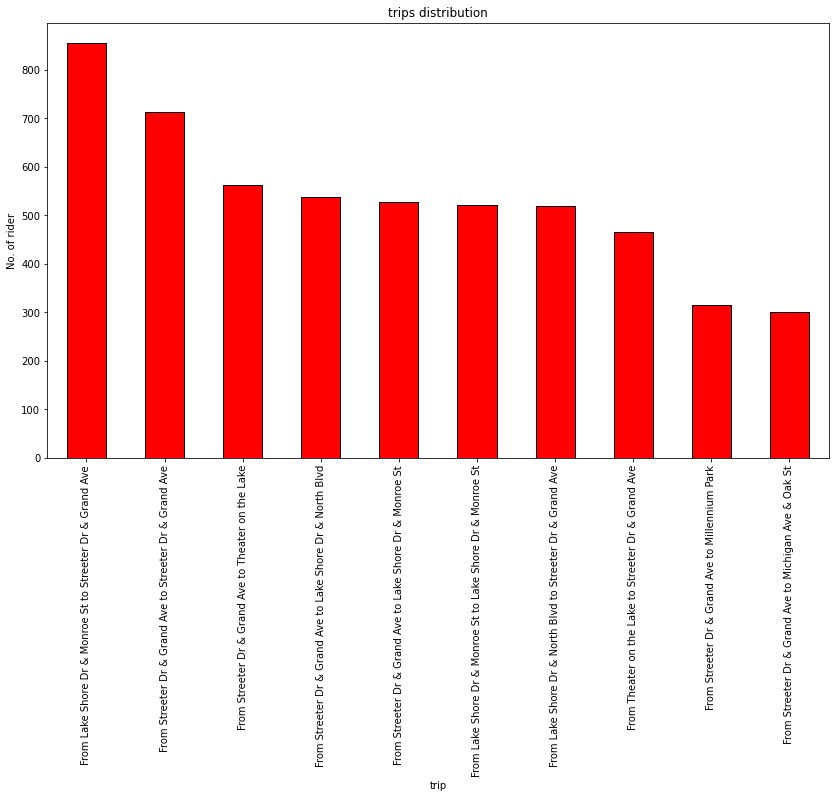

In [223]:
df["trip"]= "From " + df["Start Station"] + " to " + df["End Station"]
#print(df["trip"].mode())
x = df["trip"].value_counts().iloc[0:10] # the maximum 10 same trips

import matplotlib.pyplot as plt
%matplotlib inline  
#only with jupyter to plot inline

x.plot(kind="bar",figsize=(14,8), color='red', edgecolor='black')
plt.xlabel(x.name)
plt.ylabel("No. of rider")
plt.title("%ss distribution" % x.name)
plt.show()






In [221]:
print(df.shape[0])
print(df["Start Station"].unique().shape[0])
print(df["Start Station"].unique()[0])


print(df.shape[0])
print(df["End Station"].unique().shape[0])
print(df["End Station"].unique()[0])

300000
568
Wood St & Hubbard St
300000
572
Damen Ave & Chicago Ave


In [266]:
y= df[df['month']==1]     # for the month number 1
print(y.shape[0])         # number of rider at this month


(21809, 17)


In [6]:
import pandas as pd

filename = 'chicago.csv'
df = pd.read_csv(filename)                           # load data file into a dataframe
df['Start Time'] = pd.to_datetime(df['Start Time'])  # convert the Start Time column to datetime
df['hour'] = df['Start Time'].dt.hour                # extract hour from the Start Time column to create an hour column
popular_hour = df['hour'].mode()[0]                  # find the most popular hour
print('Most Popular Start Hour:', popular_hour)


Most Popular Start Hour: 17


In [34]:
import pandas as pd

filename = 'chicago.csv'
df = pd.read_csv(filename)                   # load data file into a dataframe
user_types = df['User Type'].value_counts()  # print value counts for each user type
print(user_types)

Subscriber    238889
Customer       61110
Dependent          1
Name: User Type, dtype: int64


In [163]:
import pandas as pd

CITY_DATA = { 'chicago': 'chicago.csv',
              'new york city': 'new_york_city.csv',
              'washington': 'washington.csv' }

def load_data(city, month, day):
    """
    Loads data for the specified city and filters by month and day if applicable.

    Args:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    Returns:
        df - Pandas DataFrame containing city data filtered by month and day
    """


    df = pd.read_csv(CITY_DATA[city])                    # load data file into a dataframe
    df['Start Time'] = pd.to_datetime(df['Start Time'])  # convert the Start Time column to datetime
    df['month'] = df['Start Time'].dt.month              # extract month and day of week from Start Time to create new columns
    df['day_of_week'] = df['Start Time'].dt.weekday_name
    
    if month != 'all':                                  # filter by month if applicable
        months = ['january', 'february', 'march', 'april', 'may', 'june']   # use the index of the months list to get the corresponding int
        month = months.index(month) + 1
        df = df[df['month'] == month]                   # filter by month to create the new dataframe

    if day != 'all':                                    # filter by day of week if applicable
        df = df[df['day_of_week'] == day.title()]       # filter by day of week to create the new dataframe

    return df

AttributeError: 'DatetimeProperties' object has no attribute 'weekday_name'

In [278]:
time_stats(df)

NameError: name 'time_stats' is not defined